Both are methods to reduce the variance of a model. They are calucalted by the following formulas:

    - Ridge:  Sum of rediduals + Lambda * (parameter)**2 (parameter in linear regression equals to the slope)
    
    - Lasso:  Sum of redisual +  Lambda * |parameter|
    
They both work by adding a penalty to the parameter size. The bigger the parameter the higher the penalty. By iterating over different Lambdas and using cross validation one can find the optimal Lambda value.  
#### The difference in both techniques is that Lasso regression can reduce the value of the parameter to zero and therefor get rid of it. 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## EDA

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/ISL-Ridge-Lasso/master/data/Advertising.csv')
data.head()
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='red'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

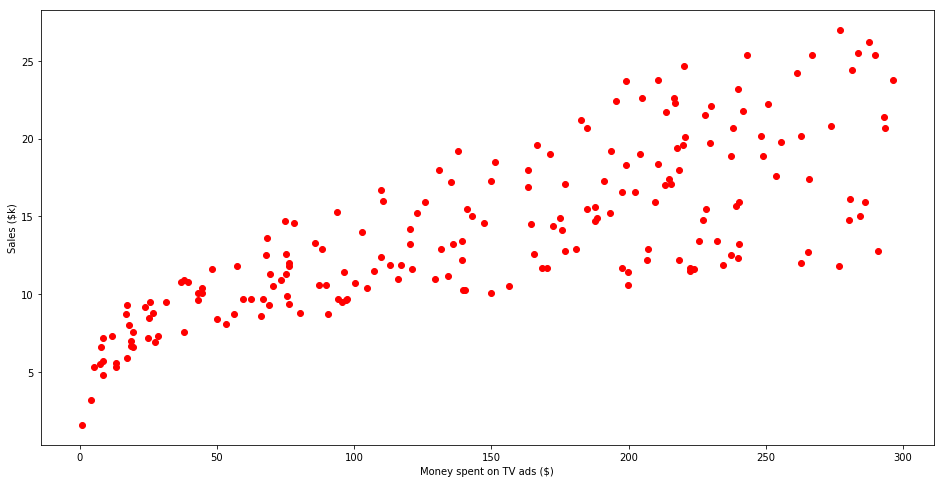

In [20]:
scatter_plot('TV', 'sales')

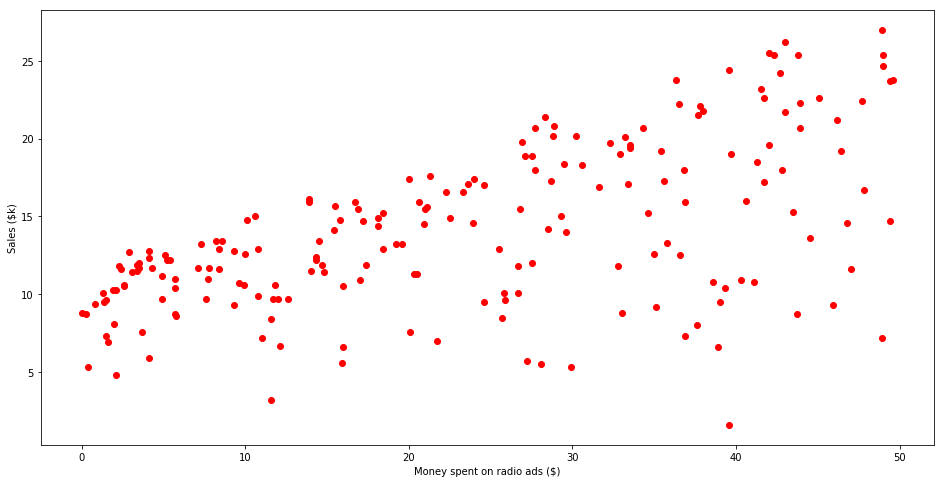

In [21]:
scatter_plot('radio', 'sales')

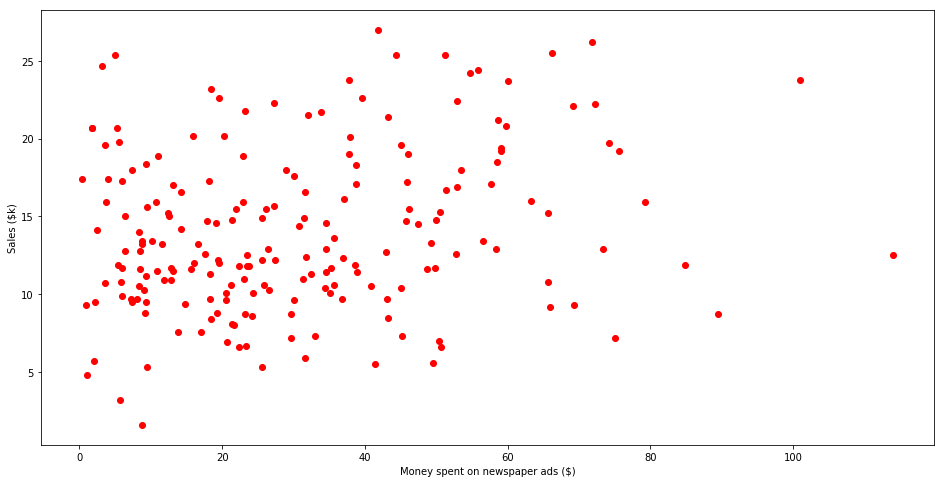

In [22]:
scatter_plot('newspaper', 'sales')

## Modelling

### Least Square Fitting aka. linear Regression

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-3.07294659710021


#### Ridge Regression

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# The different alpha values that are iterated through
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [25]:
ridge_regressor.best_params_

{'alpha': 20}

In [26]:
ridge_regressor.best_score_

-3.0726713383411433

In [27]:
delta_ridge = mean_MSE - ridge_regressor.best_score_
print(delta_ridge)

-0.00027525875906686537


#### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso()
# Again we give the gridsearch function a dict with the alphas we want to try out.
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
lasso_regressor.best_params_

{'alpha': 1}

In [32]:
delta_lass= lasso_regressor.best_score_ - mean_MSE
print(delta_lass)

0.03154070034884171


In [33]:
delta_delta = delta_lass - delta_ridge
print(delta_delta)

0.031815959107908576
